# Lesson 17 深度视觉应用（上）构建自己的深度视觉项目

计算机识别的基本任务：识别（recognition）、检测（detection）、分割（segmentation）
识别：以图像中的单一对象为核心、采集信息并做出判断的任务  
检测任务和分割任务是针对图像中多个或单个对象进行判断的任务，因此分割和检测任务所使用的图像往往要复杂很多。


## 一、数据

### 1.认识经典数据


在人脸识别中，我们有两种识别策略：
1. 策略是以人名为标签进行多分类，在训练样本中包含大量的同一个人的照片，测试集中也包含这个人的照片，看CNN能否正确预测出这个人的名字；
2. 而第二种策略则是一种二分类策略，在训练样本中给与算法两张照片，通过计算距离或计算某种相似性，来判断两张照片是否是同一个人，输出的标签为“是/否相似或一致”，在这种策略中，测试集的样本也是两张照片，并且测试集的样本不需要出现在训练
集中。

In [2]:
#————————————————————————————导入fmnist的数据————————————————————————————
#在频繁调用数据的过程中，可能出现环境问题，导致jupyter整个崩溃刷新
#为解决/避免该问题，对环境进行了部分修改
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torchvision
import torchvision.transforms as transforms

fmnist = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                         ,train =True #根据类的不同，参数可能发生变化
                                         ,download =True #未下载则设置为True
                                         ,transform =transforms.ToTensor())


"""
svhn = torchvision.datasets.SVHN(root ='F:\datasets\SVHN'
                                 ,split ="train"
                                 ,download = False
                                 ,transform = transforms.ToTensor())  

omnist = torchvision.datasets.Omniglot(root ='F:\datasets'
                                       ,background = True  # 使用训练集
                                       ,download = False
                                       ,transform = transforms.ToTensor())
"""


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting F:\datasets\FashionMNIST\raw\train-images-idx3-ubyte.gz to F:\datasets\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting F:\datasets\FashionMNIST\raw\train-labels-idx1-ubyte.gz to F:\datasets\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting F:\datasets\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to F:\datasets\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting F:\datasets\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to F:\datasets\FashionMNIST\raw



In [10]:
#如返回结果所示，除了样本量之外什么都无法看见
fmnist

# #之前我们使用.data的方式查看特征，.target的方式查看标签，但如下所示，不同的数据集并不共享调用API
for i in [fmnist]:
    print(i.data.shape)

for i in [fmnist]:
    print(i.targets.shape)

print('=======================')


#-==============================
#索引的方式调用单个样本
fmnist[0]
len(fmnist) #查看样本量
    
#报错概率最低的查看方式
for i in [fmnist]:
    for x,y in i:
        print(x.shape,y)
        break

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: F:\datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

torch.Size([60000, 28, 28])
torch.Size([60000])


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

60000

torch.Size([1, 28, 28]) 9


### 1.2 竞赛数据：ImageNet、COCO、VOC、LSUN


## 2 使用自己的数据/图片创造数据集

原始数据格式可能是各种情况，最常见的是各类压缩文件、pt文件、数据库格式文件或者png/jpg/webp等原始图像。如果你的数据是来自于实验室、公司数据库、甚至是领导/导师给的数据，那你的数据大概率都是csv/txt/mat等结构的二维数据表。无论我们的原始数据集是呈现什么样的格式，我们必须将其转换为四维的张量，数据才可以被卷积神经网络处理。

### 2.1 从图像png/jpg到四维tensor

1. **ImageFolder**
当你拥有的数据是一系列图像，并且每个标签对应的图像是存放在单独的文件夹中，那你几乎遇见了最简单的情况。在torchvision中存在直接将文件夹中的图片打包成tensor的类ImageFolder，它的参数和torchvision.datasets中其他数据导入类的参数非常相似，其中root是你的原始图像所在的根目录，transform是你希望对图像执行的具体操作。
```
train_dataset = torchvision.datasets.ImageFolder(root="XXXX"                     
                            ,transform=torchvision.transforms.ToTensor()
                                       )

```
- 还能够通过文件夹的分类自动识别标签,标签必须放在根目录下的第一层
- torchvision.transforms.ToTensor() 转换为tensor
- 在ImageFolder中可以使用属性`.classes&.targets`

2. **自己写一个读取数据的类**

*CLASS torch.utils.data.Dataset*  
如果一个读取数据的类继承自Dataset，那它读取出的数据一定是可以通过索引的方式进行调用和查看的，而继承自其他父类的、读取数据集的功能却不一定能使用索引进行查看，这种性质让Dataset子类的构成也与其他类不同。

**Dataset中规定，如果一个子类要继承Dataset，则必须在子类中定义 __getitem__() 方法。** ，它是帮助我们“获取对象”的方法。这个方法中的代码必须满足三个功能：
- 1）读取单个图片并转化为张量
- 2）读取该图片对应的标签
- 3）将该图片的张量与对应标签打包成一个样本并输出

- read_scv(目录,sep=' ',header=True) sep分隔符

In [13]:
import skimage

from skimage import io
import pandas as pd
import torch
import os

In [16]:
# 读取一张图片
io.imread(r'G:\Python学习资料2022年\codetest\pytorch&深度学习\Note_pytorch\Note_PyTorch\edge detection.PNG')


array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [ 78,  78,  78, 255],
        [ 82,  82,  82, 255],
        ...,
        [131, 131, 131, 255],
        [234, 234, 234, 255],
        [251, 251, 251, 255]],

       ...,

       [[255, 255, 255, 255],
        [170, 170, 170, 255],
        [176, 176, 176, 255],
        ...,
        [ 73,  73,  73, 255],
        [225, 225, 225, 255],
        [249, 249, 249, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [18]:
# 读取个体识别的标签 - identity
identity = pd.read_csv(r'G:\网盘下载文件\dadata\boston_house_price.csv',header=None)
identity.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [ ]:
# 统一定义图像和csv的根目录
#包含了所有图像的目录，没有具体到某一张图像

from matplotlib import pyplot as plt
from numpy import imag


idx = 0
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
#标签文件的目录
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt"

imgic = os.path.join(imgpath,identity.iloc)   # 打包图像和标签(通过索引)

# 展示图像
io.imread(imgic)

# 把图像变成tensor 标签变成整形
image = torch.tensor(io.imread(imgdic))
# 样本 = 图像+label
sample = (image,int(identity.iloc[idx,1]))


# 一样可以查看样本
plt.imshow(image)


In [20]:
#————————————————————————————对上述方法定义一个类————————————————————————————
from cv2 import transform
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    """
   自定义数据集，用于读取celebA数据集中的属性识别（attribute recognition）数据的标签和图像图像格式为jpg
   """
    def __init__(self,csv_file,root_dir,tramsfrom) -> None:
        """
       参数说明：
           csv_file (字符串): 标签csv/txt的具体地址
           root_dir (string): 所有图片所在的根目录
           transform (callable, optional): 选填，需要对样本进行的预处理
    """
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=' ',header=None)
        self.root_dir = root_dir
        self.tranfrom, = transform

    def __len__(self):
        return len(Dataset)

    def __info__(self):
        print('CustomData')
        print("\t Number of samples: {}".format(len(self.identity)))
        print("\t Number of classes: {}".format(len(np.unique(self.identity.iloc[:,1]))))
        print("\t root_dir: {}".format(self.root_dir))

    def __getitem__(self,idx):
        # 保证idx不是一个张量
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # 图像目录    
        imgic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) 
        # 提取出来的，索引为idx的图像的像素值矩阵
        image = io.imread(imgic)  # 提取出索引为idx的图片像素矩阵
        label = self.identity.iloc[idx,1]

        if self.tranfrom != None:
            image = self.tranfrom(image)

        sample = (image,label)
        return sample

In [ ]:
# 测试

data = 

### 2.2 从二维表（csv/txt）到四维tensor

首先二维数据基本都储存在csv/txt这些表格结构中，如果我们遇见任意表格结构，可以先将其读入Python：
```
import pandas as pd
data = pd.read_csv(r"....")

import pandas as pd
data = pd.read_csv(r"....",sep=" ")

```


array([[[[132,  44, 225, ..., 164,  30, 231],
         [228, 208,  50, ...,  12, 188,  86],
         [135, 118, 117, ...,   5,  90, 203],
         ...,
         [ 39,  63,  58, ..., 183, 197,  76],
         [252, 146,  27, ...,  71, 188,  35],
         [194, 144, 197, ..., 229,  97, 131]]],


       [[[135, 218,  30, ..., 136,  36,  63],
         [ 28, 125,  87, ...,  69, 190, 179],
         [ 87,  57,  81, ..., 245, 101,  24],
         ...,
         [172, 132, 167, ...,  68, 212,  35],
         [106, 129,  55, ...,  39, 197,  19],
         [ 31, 135,  19, ...,  20,  93, 239]]],


       [[[246, 230, 154, ...,  73, 211, 161],
         [ 33, 242,   0, ..., 222,  91, 252],
         [130,  27, 103, ...,  55, 245,  27],
         ...,
         [249,  89, 225, ...,  71, 117, 125],
         [251,  97, 187, ..., 192, 182, 101],
         [ 60, 153, 141, ...,  51,  64, 234]]],


       ...,


       [[[ 70, 138, 212, ..., 213, 168, 113],
         [ 29, 112,  17, ...,   5, 180, 195],
         [11

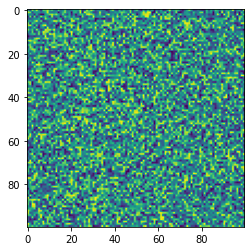

In [22]:
data = np.random.randint(0,255,(10,10000))

data.reshape((10,1,100,100))  # 样本量,通道的书目，宽 高

# 放在tensor中转换格式 
data = torch.tensor(data)

plt.imshow(data.view(-1,100,100,1)[0])  # 灰度图

对于大多数二维数据表而言，真正的问题是没有足够的特征用于变形。

但对卷积神经网络来说，我们至少也需要784（28*28）个特征。那低维数据要怎样才能够放入卷积网络中进行训练呢？答案是先升维，再变化结构。在这里，我介绍一种常见的升维方式：**多项式升维**。这是一种将特征数据交互相乘来增加特征维度的方法，它靠增加自变量上的次数来提升维度。
- 特征升维中的维度指的是特征的数目

*class `sklearn.preprocessing.PolynomialFeatures` (degree=2, interaction_only=False,include_bias=True)*

In [27]:
from sklearn.preprocessing import PolynomialFeatures as PF
import numpy as np

# 如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

# 二次多项式，degree控制多项式的次方 -
poly = PF(degree=2)  # 实例化
X_ = poly.fit_transform(X)  # 接口transform直接调用
X_
X_.shape

array([[1],
       [2],
       [3]])

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

(3, 3)

In [28]:
# 三次多项式
PF(degree=3).fit_transform(X)


array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [29]:
X = np.arange(6).reshape(3, 2)
X
#二次多项式
PF(degree=2).fit_transform(X)


array([[0, 1],
       [2, 3],
       [4, 5]])

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

多项式变化是对原始特征进行重组后形成新的特征，并没有在原始特征基础上进行深层特征提取，因此当原始特征本来就非常少时，多项式变化非常容易导致过拟合。(见例子1)

但是，当特征本身含有较多信息，在升维之后也不会那么容易过拟合，比较适合放入卷积网络进行训练.(见例子2）

In [30]:
#在加利福尼亚房价数据集上做实验
#这是基于sklearn框架的代码，与传统深度学习代码有较大区别
from sklearn.datasets import fetch_california_housing as FCH
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR #线性回归
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

In [39]:
#————————————————————————————例子1：多项式回归过拟合的情况————————————————————————————

#在加利福尼亚房价数据集上做实验
#这是基于sklearn框架的代码，与传统深度学习代码有较大区别
from sklearn.datasets import fetch_california_housing as FCH
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR #线性回归
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split


data = FCH()

X = data.data
y = data.target


Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

# 实例化
reg = LR().fit(Xtrain,Ytrain)

MSE(reg.predict(Xtrain),Ytrain)
MSE(reg.predict(Xtest),Ytest)
#训练集和测试集结果非常相近，虽然表现不佳但是不存在太多过拟合的情况


# 利用多项式升维
Xtrain_ = PF(degree=4).fit_transform(Xtrain)
Xtest_ = PF(degree= 4).fit_transform(Xtest)

reg = LR().fit(Xtrain_,Ytrain)
MSE(reg.predict(Xtrain_),Ytrain)
MSE(reg.predict(Xtest_),Ytest) #测试集上的MSE变得巨大无比，这是严重过拟合的情况


0.52185226625331

0.5309012639324554

0.3043363245138651

280760.6873681591

In [1]:
#————————————————————————————例子2：多项式升维用于深度学习的数据————————————————————————————
from sklearn.datasets import fetch_covtype as FC
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LogisticRegression as LR #逻辑回归
from sklearn.model_selection import train_test_split as TTS

data = FC()
data.data.shape # 数据量巨大因此，我们从中抽样2000个样本

X = data.data[:2000]
y = data.target[:2000]
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)



(581012, 54)

In [4]:

#======【TIME WARNING：1mins】=======#
clf = LR(random_state=420, max_iter=1000,solver="newton-cg").fit(Xtrain,Ytrain)
clf.score(Xtrain,Ytrain) #对分类模型而言，该接口是分类准确率
clf.score(Xtest,Ytest)


# 利用多项式升维
Xtrain_ = PF(degree=2,interaction_only=True).fit_transform(Xtrain)  # 不包含特征的平方项，只有交叉项
Xtest_ = PF(degree=2,interaction_only=True).fit_transform(Xtest) 


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.7528571428571429

0.7133333333333334

In [21]:
#======【TIME WARNING：10mins】======#
clf_ = LR(random_state=420, max_iter=1000,solver="newton-cg").fit(Xtrain_,Ytrain)
clf_.score(Xtrain_,Ytrain)
clf_.score(Xtest_,Ytest)

# #准确率表现整体上升，存在过拟合但没有太夸张，数据适合放入卷积网络
# 跑的太慢了 跑了105min...

KeyboardInterrupt: 

还有很多其他的升维方法，但多项式是既不改变原有特征、又明确能够一定程度上提升模型表现的方法之一，它唯一的缺点就是无法规定具体升维至多少维度。在卷积网络中，我们需要将特征转化为两数相乘的结构，其中又以偶数x偶数为最佳

In [ ]:
clf_.coef_.shape #通过逻辑回归的权重选择，逻辑回归是二分类算法，得出的权重是针对7个类别的权重

#首先对权重取绝对值，然后求7个类别上权重的平均
weights = pd.DataFrame(abs(clf_.coef_).mean(axis=0))


#按平均值对特征进行排序，对模型贡献更大的特征排在前面，
idx = weights.sort_values(by=0,ascending=False).iloc[:1444,0].index
#将整个数据升维
X_ = poly.transform(X)
X_ = X_[:,idx]
X_ = X_.reshape(2000,1,38,38)
X_.shape


NameError: name 'clf_' is not defined

In [9]:
#获得4维数据，可以利用tensorDataset进行数据打包
from torch.utils.data import TensorDataset

data = TensorDataset(torch.tensor(X_),torch.tensor(y))
for x,y in data:
    print(x.shape)
    print(y)
    break

# 现在只要将数据放入random_split就可以分割训练集测试集，再放入DataLoader分割批次，就可以导入训练了。

NameError: name 'X_' is not defined

In [ ]:
# 如何将特诊高维拒诊和标签结合起来

from torch.utils.data import TensorDataset

data = TensorDataset(torch.tensor(X_),torch.tensor(y))


### 2.3 从mat/pt/lmdb到四维tensor

In [ ]:
#FashionMNIST数据集就是pt格式的数据，可以直接使用torch.load进行读取
#import torch
X, y = torch.load(r"F:\datasets\FashionMNIST\processed\test.pt")
X.shape
y
#mat格式，SVHN就是mat格式数据集，我们使用scipy中的sio模块进行读取
#通常来说，scipy属于anaconda自带库，无需额外安装。如果你需要安装scipy，搜索pip安装scipy即可
import scipy.io as sio
#import numpy as np
#import torch

loaded_mat = sio.loadmat(r'F:\datasets\SVHN\train_32x32.mat')
X = torch.tensor(loaded_mat['X'])
y = loaded_mat['y'].astype(np.int64).squeeze()

#格式与pytorch要求的不符，记得调整
X.shape
X = X.reshape(-1,3,32,32) #(sample, channels, weight, height)


### 3.图片数据的基本预处理和数据增强

#### 3.1 数据预处理

当我们将所有有效数据导入后，我们至少需要确保：
- 1）全部样本的尺寸是一致的（同时，全部样本的通道数是一致的）
- 2）图像最终以Tensor形式被输入卷积网络
- 3）图像被恰当地归一化

在PyTorch中，所有的数据预处理都可以在导入数据的时候，通过transform参数来完成，我们通常在transform参数中填写torchvision.transforms这个模块下的类。

类 |说明
|---|---|
Compose |transforms专用的，类似于nn.Sequential的打包功能，可以将数个transforms下的类打包，形成类似于管道的结构来统一执行。
CenterCrop | 中心裁剪。需要输入最终希望得到的图像尺寸。
Resize |尺寸调整。需要输入最终希望得到的图像尺寸。注意区别于使用裁剪缩小尺寸或使用填充放大尺寸。
Normalize | 归一化 (Tensor Only)。对每张图像的每个通道进行归一化，每个通道上的每个像素会减去该通道像素值的均值，并除以该通道像素值的方差。
ToTensor | (PIL Only)将任意图像转变为Tensor

首先是用来调整尺寸的两个类：中心裁剪 transforms.CenterCrop() 以及 transforms.Resize() 。

我们倾向于将图像调整到接近28x28或224x224的尺寸。当原图尺寸与目标尺寸较为接近时，我们可以使用“裁剪”功能。裁剪是会按照我们输入的目标尺寸，将大于目标尺寸的像素点丢弃的功能，因此使用裁剪必然会导致信息损失，过多的信息损失会导致卷积网络的结果变差。当需要检测或识别的对象位于图像的中心时，可以使用中心裁剪。中心裁剪会以图像中心点为参照，按照输入的尺寸从外向内进行裁剪，被裁剪掉的像素会被直接丢弃。

当图像的尺寸与目标尺寸相差较大，我们不能接受如此多的信息被丢弃的时候，就需要使用尺寸调整的类Resize。Resize是使用像素聚类、像素插补等一定程度上对信息进行提取或选择、并按要求的尺寸重排像素点的功能。一般来说，Resize过后的图片会呈现出与原图较为相似的信息，但图片尺寸会得到缩放。

In [11]:
from torchvision import transforms

In [13]:
from torch import nn
transform = transforms.Compose([transforms.Resize(256)
                             ,transforms.CenterCrop(224)])
#等价于
transform = nn.Sequential(transforms.Resize(256)
                       ,transforms.CenterCrop(224))
transform = transforms.Compose([transforms.ToTensor()
                             ,transforms.Normalize(0.5,0.5)])



调整完尺寸之后，我们需要对数据进行归一化，在这里使用的类是 `transforms.Normalize()` 。，归一化能够非常有效地改善整体训练过程速度，并对最终模型的结果造成巨大的影响。这里的归一化与BN等训练过程中存在的归一化有较大的区别，这里的归一化主要是让像素值减去一个数（默认为均值）、再除以另一个数（默认是标准差），以实现对像素值大小的改变，
让模型在一个较高的起点上训练，但并不能像BN一样改变数据的分布。

为了能够对**通道上的全部像素进行计算**，图像在被归一化之前必须被转化为Tensor。因此在实际中，我们常常将 `transforms.Normalize()` 常常和`transforms.ToTensor()` 连用，具体如下：



In [14]:
transform = transforms.Compose([transforms.ToTensor()
                             ,transforms.Normalize(0.5,0.5)])

但许多人没有注意到的是，类 `transforms.ToTensor() `已经带有归一化的功能：这个类会按照最大值
255，最小值0对图片数据进行归一化，将所有图像的像素值压缩到[0,1]之间。

```
# 没有数据集...不要运行...

data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                     ,transform = transforms.ToTensor())
data_val
data_val[0][0].max()
data_val[0][0].min() #所有值都在0-1之间
```

因此类` transforms.Normalize()` 往往是在[0,1]区间上执行。唯一的例外可能是表格数据，如果输入transforms.ToTensor() 的数据原本是二维表，那其最大值可能会远远超出255，那经过归一化后数字范围也不会在[0,1]之间。

为了避免这种情况的出现，我们可以提前将二维表的数据压缩到[0,255]之间。在类 `transforms.Normalize()` 中有两个参数，一个是mean，另一个是std，分别代表需要减去的值和需要除以的值。比较常见的填写方式有以下三种：


In [15]:
#1) 常见且通用的做法，该写法只适用于三通道图像
transforms.Normalize(mean=[0.5, 0.5, 0.5], #代表三个通道上需要减去的值分别是0.5
                     std=[0.5, 0.5, 0.5]) #代表三个通道上需要除以的值分别是0.5
#在保证数据范围在[0,1]的前提下，使用这个值可以令数据范围拓展到[-1,1]

#也可写作：
transforms.Normalize(0.5,0.5)
#这种写法中，Normalize类会根据通道数进行相应的计算，任意通道数的图像都可以使用

#注意区分，这种写法只能用于单通道（灰度）图像
transforms.Normalize([0.5],[0.5])


Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

Normalize(mean=0.5, std=0.5)

Normalize(mean=[0.5], std=[0.5])

In [16]:
#2) ImageNet数据集上的均值和方差，可被用于任意实物照片分类
transforms.Normalize(mean=[0.485, 0.456, 0.406],
                     std=[0.229, 0.224, 0.225])


Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [17]:
#3) MNIST数据集上的均值和方差，可被用于MNIST系列
transforms.Normalize((0.1307), (0.3081))
#你也可以根据自己的数据集和自己希望实现的数值范围，来计算放入Normalize的值


Normalize(mean=0.1307, std=0.3081)

In [18]:
# 没有数据集...愁啊
# #在LSUN数据集上尝试一下
# transform = transforms.Compose([transforms.ToTensor()
#                              ,transforms.Normalize(mean=[0.485, 0.456, 0.406]
#                                                    ,std=[0.229, 0.224, 0.225])])  # 打包数据
                                                   
# transform1 = transforms.Compose([transforms.ToTensor()
#                              ,transforms.Normalize(0.5,0.5)])

# data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
#                                      ,classes=["church_outdoor_val","classroom_val"]
#                                      ,transform = transform
#                                      )
# data_val[0][0].max()  # 1
# data_val[0][0].min()  # -1


### 3.2 数据增强

数据增强是数据科学体系中常用的一种增加数据量的技术，**它通过添加略微修改的现有数据、或从现有数据中重新合成新数据来增加数据量。使用数据增强技术可以极大程度地减弱数据量不足所带来的影响，还可以提升模型的鲁棒性、为模型提供各种“不变性”、增加模型抗过拟合的能力。


`torchvision.transforms`下的类可以分为四大类别：尺寸变化、像素值变化、视角变化以及其他变化。在能够让尺寸变化的类中，各类随机裁剪图像的类可以支持数据增强中的“缩放”功能。

In [57]:
import torchvision
data_val = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                         ,train =True #根据类的不同，参数可能发生变化
                                         ,download =True #未下载则设置为True
                                       #  ,transform =transforms.ToTensor()
                                       )

# data_val[120][0].shape

#原图
data_val[7788][0]




In [58]:
# 随机裁剪
transform_aug = transforms.Compose([transforms.Resize(256)
                                   ,transforms.RandomCrop(size=(224))
                                   ,transforms.RandomHorizontalFlip(p=1)])

data_val = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                         ,train =True #根据类的不同，参数可能发生变化
                                         ,download =True #未下载则设置为True
                                         # ,transform =transforms.ToTensor()  # 注释以后显示图片
                                         )
data_val[7788][0] 

在实际执行代码时，我们往往将数据增强和数据预处理的代码写在一起，如下所示：


In [59]:
# 定义transform
transform = transforms.Compose([transforms.Resize(256) #先对尺寸进行操作
                               ,transforms.RandomCrop(size=(224))
                               ,transforms.RandomHorizontalFlip(p=1) #再进行翻转、旋转等操作
                               ,transforms.RandomRotation(degrees=(-70,70))
                               ,transforms.ToTensor() #对图片都处理完成后，转换为Tensor
                               ,transforms.Normalize(mean=[0.485, 0.456, 0.406] #最后进行归一化
                                                     ,std=[0.229, 0.224, 0.225])])


In [63]:
# 导入数据

data_val = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                         ,train =True #根据类的不同，参数可能发生变化
                                         ,download =True #未下载则设置为True
                                         ,transform =transforms.ToTensor()  # 注释以后显示图片
                                         )
data_val[7788][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## 二、训练与算法

![](https://gitee.com/bravojimoon/note-picture/raw/master/torch/QQ%E6%88%AA%E5%9B%BE20221006190803.png)

### 1.更强大的优化算法
![](https://gitee.com/bravojimoon/note-picture/raw/master/torch/QQ%E6%88%AA%E5%9B%BE20221006190817.png)
今天我们要介绍基于梯度下降的更多优化算法：AdaGrad、RMSprop以及Adam。